In [1]:
import numpy as np
import networkx as nx
import matplotlib
import scipy
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
politifact_users = pd.read_table('data/politifact/politifactuseruser.txt', delim_whitespace=True, names=['from', 'to'])
buzzfeed_users = pd.read_table('data/buzzfeed/buzzfeeduseruser.txt', delim_whitespace=True, names=['from', 'to'])

In [15]:
politifact_news_spread = pd.read_table('data/politifact/politifactnewsuser.txt', delim_whitespace=True, names=['news', 'user', 'times'])
buzzfeed_news_spread = pd.read_table('data/buzzfeed/buzzfeednewsuser.txt', delim_whitespace=True, names=['news', 'user', 'times'])

In [4]:
politifact_user_graph = nx.convert_matrix.from_pandas_edgelist(politifact_users, source='from', target='to')
buzzfeed_user_graph = nx.convert_matrix.from_pandas_edgelist(buzzfeed_users, source='from', target='to')

In [5]:
users_93 = buzzfeed_news_spread.loc[buzzfeed_news_spread['news'] == 93]['user'].values
list(users_93)

[28,
 36,
 42,
 74,
 95,
 96,
 162,
 166,
 167,
 170,
 172,
 175,
 247,
 258,
 279,
 356,
 357,
 363,
 367,
 390,
 404,
 434,
 447,
 510,
 536,
 549,
 557,
 569,
 576,
 606,
 609,
 613,
 633,
 666,
 673,
 691,
 718,
 726,
 751,
 762,
 764,
 779,
 784,
 832,
 838,
 839,
 866,
 954,
 966,
 975,
 1026,
 1029,
 1030,
 1041,
 1044,
 1069,
 1077,
 1115,
 1154,
 1164,
 1213,
 1223,
 1241,
 1244,
 1298,
 1332,
 1347,
 1358,
 1383,
 1470,
 1479,
 1484,
 1516,
 1523,
 1528,
 1529,
 1534,
 1535,
 1540,
 1570,
 1592,
 1669,
 1674,
 1687,
 1691,
 1697,
 1703,
 1704,
 1743,
 1750,
 1759,
 1768,
 1776,
 1793,
 1795,
 1862,
 1865,
 1868,
 1888,
 1927,
 1951,
 1954,
 1985,
 2023,
 2041,
 2042,
 2053,
 2093,
 2108,
 2123,
 2133,
 2142,
 2166,
 2212,
 2229,
 2238,
 2256,
 2266,
 2389,
 2451,
 2484,
 2530,
 2534,
 2552,
 2576,
 2625,
 2693,
 2757,
 2885,
 2991,
 3010,
 3043,
 3046,
 3055,
 3101,
 3108,
 3142,
 3152,
 3169,
 3197,
 3205,
 3212,
 3223,
 3225,
 3258,
 3293,
 3328,
 3336,
 3354,
 3361,
 3392,

In [6]:
graph_93 = buzzfeed_user_graph.subgraph(list(users_93))

In [7]:
graph_93

In [8]:
nx.average_clustering(graph_93)

0.0648022665602941

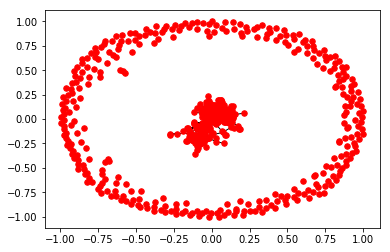

In [11]:
nx.draw_networkx(graph_93, node_size=30, with_labels=False)

In [12]:
buzzfeed_real = range(1, 92)
buzzfeed_fake = range(92, 183)
politifact_real = range(1, 121)
politifact_fake = range(121, 241)

In [56]:
def calculate_ccs(source, graph, real, fake):
    real_ccs = []
    fake_ccs = []
    for news in real:
        users = source.loc[source['news'] == news]['user'].values
        subg = graph.subgraph(list(users))
        real_ccs.append(nx.average_clustering(subg))
    for news in fake:
        users = source.loc[source['news'] == news]['user'].values
        subg = graph.subgraph(list(users))
        fake_ccs.append(nx.average_clustering(subg))

    average_real = np.average(real_ccs)
    average_fake = np.average(fake_ccs)
    return (average_real, average_fake)

In [57]:
bf_real_cc, bf_fake_cc = calculate_ccs(buzzfeed_news_spread, buzzfeed_user_graph, buzzfeed_real, buzzfeed_fake)
print('avg real cc, buzzfeed: ' + str(bf_real_cc))
print('avg fake cc, buzzfeed: ' + str(bf_fake_cc))

avg real cc, buzzfeed: 0.008337101071855108
avg fake cc, buzzfeed: 0.011960459531932203


In [58]:
pf_real_cc, pf_fake_cc = calculate_ccs(politifact_news_spread, politifact_user_graph, politifact_real, politifact_fake)
print('avg real cc, politifact: ' + str(pf_real_cc))
print('avg fake cc, politifact: ' + str(pf_fake_cc))

avg real cc, politifact: 0.0004417234703421145
avg fake cc, politifact: 0.0036281067393171816


In [59]:
def calculate_ccs_and_apls(source, graph, real, fake):
    real_ccs = []
    fake_ccs = []
    real_apls = []
    fake_apls = []
    for news in real:
        users = source.loc[source['news'] == news]['user'].values
        subg = graph.subgraph(list(users))
        subg = max(nx.connected_component_subgraphs(subg), key=len)
        real_ccs.append(nx.average_clustering(subg))
        real_apls.append(nx.average_shortest_path_length(subg))
    for news in fake:
        users = source.loc[source['news'] == news]['user'].values
        subg = graph.subgraph(list(users))
        subg = max(nx.connected_component_subgraphs(subg), key=len)
        fake_ccs.append(nx.average_clustering(subg))
        fake_apls.append(nx.average_shortest_path_length(subg))

    average_real = np.average(real_ccs)
    average_fake = np.average(fake_ccs)
    average_real_apl = np.average(real_apls)
    average_fake_apl = np.average(fake_apls)
    return (average_real, average_fake, average_real_apl, average_fake_apl)

In [60]:
bf_real_cc_giant, bf_fake_cc_giant, bf_real_apl_giant, bf_fake_apl_giant = calculate_ccs_and_apls(buzzfeed_news_spread, buzzfeed_user_graph, buzzfeed_real, buzzfeed_fake)
pf_real_cc_giant, pf_fake_cc_giant, pf_real_apl_giant, pf_fake_apl_giant = calculate_ccs_and_apls(politifact_news_spread, politifact_user_graph, politifact_real, politifact_fake)

In [61]:
print('avg real cc, buzzfeed, giant component: ' + str(bf_real_cc_giant))
print('avg fake cc, buzzfeed, giant component: ' + str(bf_fake_cc_giant))
print('avg real apl, buzzfeed, giant component: ' + str(bf_real_apl_giant))
print('avg fake apl, buzzfeed, giant component: ' + str(bf_fake_apl_giant))
print()
print('avg real cc, politifact, giant component: ' + str(pf_real_cc_giant))
print('avg fake cc, politifact, giant component: ' + str(pf_fake_cc_giant))
print('avg real apl, politifact, giant component: ' + str(pf_real_apl_giant))
print('avg fake apl, politifact, giant component: ' + str(pf_fake_apl_giant))

avg real cc, buzzfeed, giant component: 0.02188646159365328
avg fake cc, buzzfeed, giant component: 0.043310325577771584
avg real apl, buzzfeed, giant component: 1.596574873272792
avg fake apl, buzzfeed, giant component: 1.4690079692315843

avg real cc, politifact, giant component: 0.0018112744152661514
avg fake cc, politifact, giant component: 0.016920161945706762
avg real apl, politifact, giant component: 0.7562923984146104
avg fake apl, politifact, giant component: 1.685158131048333


In [62]:
def calculate_ccs_and_apl_ranges(source, graph, real, fake):
    real_ccs = []
    fake_ccs = []
    real_apls = []
    fake_apls = []
    for news in real:
        users = source.loc[source['news'] == news]['user'].values
        subg = graph.subgraph(list(users))
        subg = max(nx.connected_component_subgraphs(subg), key=len)
        real_ccs.append(nx.average_clustering(subg))
        real_apls.append(nx.average_shortest_path_length(subg))
    for news in fake:
        users = source.loc[source['news'] == news]['user'].values
        subg = graph.subgraph(list(users))
        subg = max(nx.connected_component_subgraphs(subg), key=len)
        fake_ccs.append(nx.average_clustering(subg))
        fake_apls.append(nx.average_shortest_path_length(subg))

    return (real_ccs, fake_ccs, real_apls, fake_apls)

In [63]:
def min_nonzero(x):
    if x == 0:
        return float('inf')
    return x

In [64]:
bf_real_ccs, bf_fake_ccs, bf_real_apls, bf_fake_apls = calculate_ccs_and_apl_ranges(buzzfeed_news_spread, buzzfeed_user_graph, buzzfeed_real, buzzfeed_fake)
pf_real_ccs, pf_fake_ccs, pf_real_apls, pf_fake_apls = calculate_ccs_and_apl_ranges(politifact_news_spread, politifact_user_graph, politifact_real, politifact_fake)

print('range real cc, buzzfeed, giant component: ' + '[' + str(min(bf_real_ccs, key=min_nonzero)) + ', ' + str(max(bf_real_ccs)) + ']')
print('range fake cc, buzzfeed, giant component: ' + '[' + str(min(bf_fake_ccs, key=min_nonzero)) + ', ' + str(max(bf_fake_ccs)) + ']')
print('range real apl, buzzfeed, giant component: ' + '[' + str(min(bf_real_apls, key=min_nonzero)) + ', ' + str(max(bf_real_apls)) + ']')
print('range fake apl, buzzfeed, giant component: ' + '[' + str(min(bf_fake_apls, key=min_nonzero)) + ', ' + str(max(bf_fake_apls)) + ']')
print()
print('range real cc, politifact, giant component: ' + '[' + str(min(pf_real_ccs, key=min_nonzero)) + ', ' + str(max(pf_real_ccs)) + ']')
print('range fake cc, politifact, giant component: ' + '[' + str(min(pf_fake_ccs, key=min_nonzero)) + ', ' + str(max(pf_fake_ccs)) + ']')
print('range real apl, politifact, giant component: ' + '[' + str(min(pf_real_apls, key=min_nonzero)) + ', ' + str(max(pf_real_apls)) + ']')
print('range fake apl, politifact, giant component: ' + '[' + str(min(pf_fake_apls, key=min_nonzero)) + ', ' + str(max(pf_fake_apls)) + ']')

range real cc, buzzfeed, giant component: [0.02426923524558455, 0.25902777777777775]
range fake cc, buzzfeed, giant component: [0.02, 1.0]
range real apl, buzzfeed, giant component: [1.0, 5.011383161512027]
range fake apl, buzzfeed, giant component: [1.0, 4.5096949891067535]

range real cc, politifact, giant component: [0.020833333333333332, 0.0879928315412186]
range fake cc, politifact, giant component: [0.028194444444444446, 0.35000000000000003]
range real apl, politifact, giant component: [1.0, 7.142372881355932]
range fake apl, politifact, giant component: [1.0, 6.158641975308642]


(array([115.,   0.,   2.,   0.,   1.,   1.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.00879928, 0.01759857, 0.02639785, 0.03519713,
        0.04399642, 0.0527957 , 0.06159498, 0.07039427, 0.07919355,
        0.08799283]),
 <a list of 10 Patch objects>)

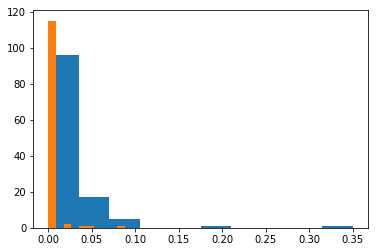

In [30]:
plt.hist(pf_fake_ccs)
plt.hist(pf_real_ccs)

(array([69.,  7.,  4.,  3.,  4.,  2.,  0.,  1.,  0.,  1.]),
 array([0.        , 0.02590278, 0.05180556, 0.07770833, 0.10361111,
        0.12951389, 0.15541667, 0.18131944, 0.20722222, 0.233125  ,
        0.25902778]),
 <a list of 10 Patch objects>)

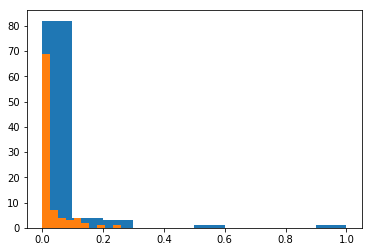

In [31]:
plt.hist(bf_fake_ccs)
plt.hist(bf_real_ccs)

(array([68., 27., 16.,  2.,  5.,  1.,  0.,  0.,  0.,  1.]),
 array([0.        , 0.71423729, 1.42847458, 2.14271186, 2.85694915,
        3.57118644, 4.28542373, 4.99966102, 5.71389831, 6.42813559,
        7.14237288]),
 <a list of 10 Patch objects>)

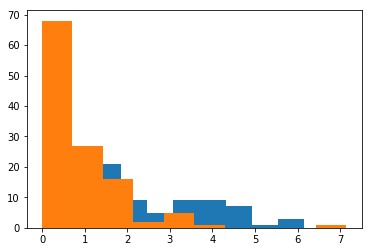

In [32]:
plt.hist(pf_fake_apls)
plt.hist(pf_real_apls)

(array([30., 12., 12.,  9.,  3.,  3.,  5., 10.,  6.,  1.]),
 array([0.        , 0.50113832, 1.00227663, 1.50341495, 2.00455326,
        2.50569158, 3.0068299 , 3.50796821, 4.00910653, 4.51024485,
        5.01138316]),
 <a list of 10 Patch objects>)

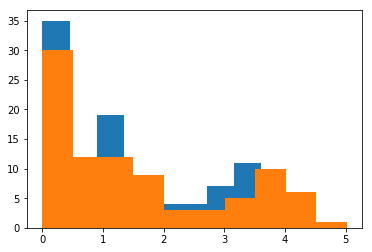

In [33]:
plt.hist(bf_fake_apls)
plt.hist(bf_real_apls)

In [43]:
import json
def is_trump(s):
    words = s.split(" ")
    for word in words:
        if word.lower() == "trump":
            return True
    return False

In [44]:
politifact_trump_real = []
politifact_other_real = []
for news in politifact_real:
    with open('data/politifact/realnewscontent/PolitiFact_Real_' + str(news) + '-Webpage.json', 'r') as json_file:
        data = json.load(json_file)
    body = data["text"]
    if is_trump(body):
        politifact_trump_real.append(news)
    else:
        politifact_other_real.append(news)

politifact_trump_fake = []
politifact_other_fake = []
for news in politifact_fake:
    news_id = news - 120
    with open('Data/PolitiFact/FakeNewsContent/PolitiFact_Fake_' + str(news_id) + '-Webpage.json', 'r') as json_file:
        data = json.load(json_file)
    body = data["text"]
    if is_trump(body):
        politifact_trump_fake.append(news)
    else:
        politifact_other_fake.append(news)
    

In [71]:
buzzfeed_trump_real = []
buzzfeed_other_real = []
for news in buzzfeed_real:
    with open('data/buzzfeed/realnewscontent/Buzzfeed_Real_' + str(news) + '-Webpage.json', 'r') as json_file:
        data = json.load(json_file)
    body = data["text"]
    if is_trump(body):
        buzzfeed_trump_real.append(news)
    else:
        buzzfeed_other_real.append(news)

buzzfeed_trump_fake = []
buzzfeed_other_fake = []
for news in buzzfeed_fake:
    news_id = news - 91
    with open('Data/buzzfeed/FakeNewsContent/buzzfeed_Fake_' + str(news_id) + '-Webpage.json', 'r') as json_file:
        data = json.load(json_file)
    body = data["text"]
    if is_trump(body):
        buzzfeed_trump_fake.append(news)
    else:
        buzzfeed_other_fake.append(news)

In [72]:
bf_trump_real_cc, bf_trump_fake_cc, bf_trump_real_apl, bf_trump_fake_apl = calculate_ccs_and_apls(buzzfeed_news_spread, buzzfeed_user_graph, buzzfeed_trump_real, buzzfeed_trump_fake)
bf_other_real_cc, bf_other_fake_cc, bf_other_real_apl, bf_other_fake_apl = calculate_ccs_and_apls(buzzfeed_news_spread, buzzfeed_user_graph, buzzfeed_other_real, buzzfeed_other_fake)

In [73]:
print('avg real cc, buzzfeed, trump giant component: ' + str(bf_trump_real_cc))
print('avg fake cc, buzzfeed, trump giant component: ' + str(bf_trump_fake_cc))
print('avg real apl, buzzfeed, trump giant component: ' + str(bf_trump_real_apl))
print('avg fake apl, buzzfeed, trump giant component: ' + str(bf_trump_fake_apl))
print()
print('avg real cc, buzzfeed, other giant component: ' + str(bf_other_real_cc))
print('avg fake cc, buzzfeed, other giant component: ' + str(bf_other_fake_cc))
print('avg real apl, buzzfeed, other giant component: ' + str(bf_other_real_apl))
print('avg fake apl, buzzfeed, other giant component: ' + str(bf_other_fake_apl))

avg real cc, buzzfeed, trump giant component: 0.024290204389537794
avg fake cc, buzzfeed, trump giant component: 0.04430420128219759
avg real apl, buzzfeed, trump giant component: 1.5677974836194921
avg fake apl, buzzfeed, trump giant component: 1.4599979314443505

avg real cc, buzzfeed, other giant component: 0.0183782964320921
avg fake cc, buzzfeed, other giant component: 0.0427174874382894
avg real apl, buzzfeed, other giant component: 1.638574306820852
avg fake apl, buzzfeed, other giant component: 1.4743823777362501


In [75]:
politifact_trump_real = []
politifact_other_real = []
for news in politifact_real:
    with open('data/politifact/realnewscontent/politifact_Real_' + str(news) + '-Webpage.json', 'r') as json_file:
        data = json.load(json_file)
    body = data["text"]
    if is_trump(body):
        politifact_trump_real.append(news)
    else:
        politifact_other_real.append(news)

politifact_trump_fake = []
politifact_other_fake = []
for news in politifact_fake:
    news_id = news - 120
    with open('Data/politifact/FakeNewsContent/politifact_Fake_' + str(news_id) + '-Webpage.json', 'r') as json_file:
        data = json.load(json_file)
    body = data["text"]
    if is_trump(body):
        politifact_trump_fake.append(news)
    else:
        politifact_other_fake.append(news)

In [76]:
pf_trump_real_cc, pf_trump_fake_cc, pf_trump_real_apl, pf_trump_fake_apl = calculate_ccs_and_apls(politifact_news_spread, politifact_user_graph, politifact_trump_real, politifact_trump_fake)
pf_other_real_cc, pf_other_fake_cc, pf_other_real_apl, pf_other_fake_apl = calculate_ccs_and_apls(politifact_news_spread, politifact_user_graph, politifact_other_real, politifact_other_fake)

In [77]:
print('avg real cc, politifact, trump giant component: ' + str(pf_trump_real_cc))
print('avg fake cc, politifact, trump giant component: ' + str(pf_trump_fake_cc))
print('avg real apl, politifact, trump giant component: ' + str(pf_trump_real_apl))
print('avg fake apl, politifact, trump giant component: ' + str(pf_trump_fake_apl))
print()
print('avg real cc, politifact, other giant component: ' + str(pf_other_real_cc))
print('avg fake cc, politifact, other giant component: ' + str(pf_other_fake_cc))
print('avg real apl, politifact, other giant component: ' + str(pf_other_real_apl))
print('avg fake apl, politifact, other giant component: ' + str(pf_other_fake_apl))

avg real cc, politifact, trump giant component: 0.0029372017544856506
avg fake cc, politifact, trump giant component: 0.017309017737130384
avg real apl, politifact, trump giant component: 0.8803797235646208
avg fake apl, politifact, trump giant component: 1.437308987353334

avg real cc, politifact, other giant component: 0.0
avg fake cc, politifact, other giant component: 0.01666980273752991
avg real apl, politifact, other giant component: 0.5566736579558982
avg fake apl, politifact, other giant component: 1.8447322372629216


In [78]:
bf_real_ccs, bf_fake_ccs, bf_real_apls, bf_fake_apls = calculate_ccs_and_apl_ranges(buzzfeed_news_spread, buzzfeed_user_graph, buzzfeed_trump_real, buzzfeed_trump_fake)
pf_real_ccs, pf_fake_ccs, pf_real_apls, pf_fake_apls = calculate_ccs_and_apl_ranges(politifact_news_spread, politifact_user_graph, politifact_trump_real, politifact_trump_fake)
print("TRUMP: ")
print('range real cc, buzzfeed, giant component: ' + '[' + str(min(bf_real_ccs, key=min_nonzero)) + ', ' + str(max(bf_real_ccs)) + ']')
print('range fake cc, buzzfeed, giant component: ' + '[' + str(min(bf_fake_ccs, key=min_nonzero)) + ', ' + str(max(bf_fake_ccs)) + ']')
print('range real apl, buzzfeed, giant component: ' + '[' + str(min(bf_real_apls, key=min_nonzero)) + ', ' + str(max(bf_real_apls)) + ']')
print('range fake apl, buzzfeed, giant component: ' + '[' + str(min(bf_fake_apls, key=min_nonzero)) + ', ' + str(max(bf_fake_apls)) + ']')
print()
print('range real cc, politifact, giant component: ' + '[' + str(min(pf_real_ccs, key=min_nonzero)) + ', ' + str(max(pf_real_ccs)) + ']')
print('range fake cc, politifact, giant component: ' + '[' + str(min(pf_fake_ccs, key=min_nonzero)) + ', ' + str(max(pf_fake_ccs)) + ']')
print('range real apl, politifact, giant component: ' + '[' + str(min(pf_real_apls, key=min_nonzero)) + ', ' + str(max(pf_real_apls)) + ']')
print('range fake apl, politifact, giant component: ' + '[' + str(min(pf_fake_apls, key=min_nonzero)) + ', ' + str(max(pf_fake_apls)) + ']')
print()

bf_real_ccs, bf_fake_ccs, bf_real_apls, bf_fake_apls = calculate_ccs_and_apl_ranges(buzzfeed_news_spread, buzzfeed_user_graph, buzzfeed_other_real, buzzfeed_other_fake)
pf_real_ccs, pf_fake_ccs, pf_real_apls, pf_fake_apls = calculate_ccs_and_apl_ranges(politifact_news_spread, politifact_user_graph, politifact_other_real, politifact_other_fake)
print("OTHER:")
print('range real cc, buzzfeed, giant component: ' + '[' + str(min(bf_real_ccs, key=min_nonzero)) + ', ' + str(max(bf_real_ccs)) + ']')
print('range fake cc, buzzfeed, giant component: ' + '[' + str(min(bf_fake_ccs, key=min_nonzero)) + ', ' + str(max(bf_fake_ccs)) + ']')
print('range real apl, buzzfeed, giant component: ' + '[' + str(min(bf_real_apls, key=min_nonzero)) + ', ' + str(max(bf_real_apls)) + ']')
print('range fake apl, buzzfeed, giant component: ' + '[' + str(min(bf_fake_apls, key=min_nonzero)) + ', ' + str(max(bf_fake_apls)) + ']')
print()
print('range real cc, politifact, giant component: ' + '[' + str(min(pf_real_ccs, key=min_nonzero)) + ', ' + str(max(pf_real_ccs)) + ']')
print('range fake cc, politifact, giant component: ' + '[' + str(min(pf_fake_ccs, key=min_nonzero)) + ', ' + str(max(pf_fake_ccs)) + ']')
print('range real apl, politifact, giant component: ' + '[' + str(min(pf_real_apls, key=min_nonzero)) + ', ' + str(max(pf_real_apls)) + ']')
print('range fake apl, politifact, giant component: ' + '[' + str(min(pf_fake_apls, key=min_nonzero)) + ', ' + str(max(pf_fake_apls)) + ']')


TRUMP: 
range real cc, buzzfeed, giant component: [0.02426923524558455, 0.25902777777777775]
range fake cc, buzzfeed, giant component: [0.02464387464387464, 0.5833333333333333]
range real apl, buzzfeed, giant component: [1.0, 4.485115957078574]
range fake apl, buzzfeed, giant component: [1.0, 3.975996192030464]

range real cc, politifact, giant component: [0.020833333333333332, 0.0879928315412186]
range fake cc, politifact, giant component: [0.030741189121522943, 0.35000000000000003]
range real apl, politifact, giant component: [1.0, 3.7400404473575204]
range fake apl, politifact, giant component: [1.0, 6.058395368072787]

OTHER:
range real cc, buzzfeed, giant component: [0.033106430606430606, 0.1904761904761905]
range fake cc, buzzfeed, giant component: [0.02, 1.0]
range real apl, buzzfeed, giant component: [1.0, 5.011383161512027]
range fake apl, buzzfeed, giant component: [1.0, 4.5096949891067535]

range real cc, politifact, giant component: [0.0, 0.0]
range fake cc, politifact, gia

In [101]:
politifact_trump_real = []
politifact_other_real = []
for news in politifact_real:
    with open('data/politifact/realnewscontent/PolitiFact_Real_' + str(news) + '-Webpage.json', 'r') as json_file:
        data = json.load(json_file)
    body = data["title"]
    if is_trump(body):
        politifact_trump_real.append(news)
    else:
        politifact_other_real.append(news)

politifact_trump_fake = []
politifact_other_fake = []
for news in politifact_fake:
    news_id = news - 120
    with open('Data/PolitiFact/FakeNewsContent/PolitiFact_Fake_' + str(news_id) + '-Webpage.json', 'r') as json_file:
        data = json.load(json_file)
    body = data["title"]
    if is_trump(body):
        politifact_trump_fake.append(news)
    else:
        politifact_other_fake.append(news)
    

buzzfeed_trump_real = []
buzzfeed_other_real = []
for news in buzzfeed_real:
    with open('data/buzzfeed/realnewscontent/Buzzfeed_Real_' + str(news) + '-Webpage.json', 'r') as json_file:
        data = json.load(json_file)
    body = data["title"]
    if is_trump(body):
        buzzfeed_trump_real.append(news)
    else:
        buzzfeed_other_real.append(news)

buzzfeed_trump_fake = []
buzzfeed_other_fake = []
for news in buzzfeed_fake:
    news_id = news - 91
    with open('Data/buzzfeed/FakeNewsContent/buzzfeed_Fake_' + str(news_id) + '-Webpage.json', 'r') as json_file:
        data = json.load(json_file)
    body = data["title"]
    if is_trump(body):
        buzzfeed_trump_fake.append(news)
    else:
        buzzfeed_other_fake.append(news)

bf_trump_real_cc, bf_trump_fake_cc, bf_trump_real_apl, bf_trump_fake_apl = calculate_ccs_and_apls(buzzfeed_news_spread, buzzfeed_user_graph, buzzfeed_trump_real, buzzfeed_trump_fake)
bf_other_real_cc, bf_other_fake_cc, bf_other_real_apl, bf_other_fake_apl = calculate_ccs_and_apls(buzzfeed_news_spread, buzzfeed_user_graph, buzzfeed_other_real, buzzfeed_other_fake)

print('avg real cc, buzzfeed, trump giant component: ' + str(bf_trump_real_cc))
print('avg fake cc, buzzfeed, trump giant component: ' + str(bf_trump_fake_cc))
print('avg real apl, buzzfeed, trump giant component: ' + str(bf_trump_real_apl))
print('avg fake apl, buzzfeed, trump giant component: ' + str(bf_trump_fake_apl))
print()
print('avg real cc, buzzfeed, other giant component: ' + str(bf_other_real_cc))
print('avg fake cc, buzzfeed, other giant component: ' + str(bf_other_fake_cc))
print('avg real apl, buzzfeed, other giant component: ' + str(bf_other_real_apl))
print('avg fake apl, buzzfeed, other giant component: ' + str(bf_other_fake_apl))

politifact_trump_real = []
politifact_other_real = []
for news in politifact_real:
    with open('data/politifact/realnewscontent/politifact_Real_' + str(news) + '-Webpage.json', 'r') as json_file:
        data = json.load(json_file)
    body = data["title"]
    if is_trump(body):
        politifact_trump_real.append(news)
    else:
        politifact_other_real.append(news)

politifact_trump_fake = []
politifact_other_fake = []
for news in politifact_fake:
    news_id = news - 120
    with open('Data/politifact/FakeNewsContent/politifact_Fake_' + str(news_id) + '-Webpage.json', 'r') as json_file:
        data = json.load(json_file)
    body = data["title"]
    if is_trump(body):
        politifact_trump_fake.append(news)
    else:
        politifact_other_fake.append(news)

pf_trump_real_cc, pf_trump_fake_cc, pf_trump_real_apl, pf_trump_fake_apl = calculate_ccs_and_apls(politifact_news_spread, politifact_user_graph, politifact_trump_real, politifact_trump_fake)
pf_other_real_cc, pf_other_fake_cc, pf_other_real_apl, pf_other_fake_apl = calculate_ccs_and_apls(politifact_news_spread, politifact_user_graph, politifact_other_real, politifact_other_fake)

print('avg real cc, politifact, trump giant component: ' + str(pf_trump_real_cc))
print('avg fake cc, politifact, trump giant component: ' + str(pf_trump_fake_cc))
print('avg real apl, politifact, trump giant component: ' + str(pf_trump_real_apl))
print('avg fake apl, politifact, trump giant component: ' + str(pf_trump_fake_apl))
print()
print('avg real cc, politifact, other giant component: ' + str(pf_other_real_cc))
print('avg fake cc, politifact, other giant component: ' + str(pf_other_fake_cc))
print('avg real apl, politifact, other giant component: ' + str(pf_other_real_apl))
print('avg fake apl, politifact, other giant component: ' + str(pf_other_fake_apl))

bf_real_ccs, bf_fake_ccs, bf_real_apls, bf_fake_apls = calculate_ccs_and_apl_ranges(buzzfeed_news_spread, buzzfeed_user_graph, buzzfeed_trump_real, buzzfeed_trump_fake)
pf_real_ccs, pf_fake_ccs, pf_real_apls, pf_fake_apls = calculate_ccs_and_apl_ranges(politifact_news_spread, politifact_user_graph, politifact_trump_real, politifact_trump_fake)
print("TRUMP: ")
print('range real cc, buzzfeed, giant component: ' + '[' + str(min(bf_real_ccs, key=min_nonzero)) + ', ' + str(max(bf_real_ccs)) + ']')
print('range fake cc, buzzfeed, giant component: ' + '[' + str(min(bf_fake_ccs, key=min_nonzero)) + ', ' + str(max(bf_fake_ccs)) + ']')
print('range real apl, buzzfeed, giant component: ' + '[' + str(min(bf_real_apls, key=min_nonzero)) + ', ' + str(max(bf_real_apls)) + ']')
print('range fake apl, buzzfeed, giant component: ' + '[' + str(min(bf_fake_apls, key=min_nonzero)) + ', ' + str(max(bf_fake_apls)) + ']')
print()
print('range real cc, politifact, giant component: ' + '[' + str(min(pf_real_ccs, key=min_nonzero)) + ', ' + str(max(pf_real_ccs)) + ']')
print('range fake cc, politifact, giant component: ' + '[' + str(min(pf_fake_ccs, key=min_nonzero)) + ', ' + str(max(pf_fake_ccs)) + ']')
print('range real apl, politifact, giant component: ' + '[' + str(min(pf_real_apls, key=min_nonzero)) + ', ' + str(max(pf_real_apls)) + ']')
print('range fake apl, politifact, giant component: ' + '[' + str(min(pf_fake_apls, key=min_nonzero)) + ', ' + str(max(pf_fake_apls)) + ']')
print()

bf_real_ccs, bf_fake_ccs, bf_real_apls, bf_fake_apls = calculate_ccs_and_apl_ranges(buzzfeed_news_spread, buzzfeed_user_graph, buzzfeed_other_real, buzzfeed_other_fake)
pf_real_ccs, pf_fake_ccs, pf_real_apls, pf_fake_apls = calculate_ccs_and_apl_ranges(politifact_news_spread, politifact_user_graph, politifact_other_real, politifact_other_fake)
print("OTHER:")
print('range real cc, buzzfeed, giant component: ' + '[' + str(min(bf_real_ccs, key=min_nonzero)) + ', ' + str(max(bf_real_ccs)) + ']')
print('range fake cc, buzzfeed, giant component: ' + '[' + str(min(bf_fake_ccs, key=min_nonzero)) + ', ' + str(max(bf_fake_ccs)) + ']')
print('range real apl, buzzfeed, giant component: ' + '[' + str(min(bf_real_apls, key=min_nonzero)) + ', ' + str(max(bf_real_apls)) + ']')
print('range fake apl, buzzfeed, giant component: ' + '[' + str(min(bf_fake_apls, key=min_nonzero)) + ', ' + str(max(bf_fake_apls)) + ']')
print()
print('range real cc, politifact, giant component: ' + '[' + str(min(pf_real_ccs, key=min_nonzero)) + ', ' + str(max(pf_real_ccs)) + ']')
print('range fake cc, politifact, giant component: ' + '[' + str(min(pf_fake_ccs, key=min_nonzero)) + ', ' + str(max(pf_fake_ccs)) + ']')
print('range real apl, politifact, giant component: ' + '[' + str(min(pf_real_apls, key=min_nonzero)) + ', ' + str(max(pf_real_apls)) + ']')
print('range fake apl, politifact, giant component: ' + '[' + str(min(pf_fake_apls, key=min_nonzero)) + ', ' + str(max(pf_fake_apls)) + ']')


avg real cc, buzzfeed, trump giant component: 0.015643075875416544
avg fake cc, buzzfeed, trump giant component: 0.017391715971398516
avg real apl, buzzfeed, trump giant component: 1.4786305447008048
avg fake apl, buzzfeed, trump giant component: 1.6507474457787443

avg real cc, buzzfeed, other giant component: 0.023877106315409926
avg fake cc, buzzfeed, other giant component: 0.046874134398647876
avg real apl, buzzfeed, other giant component: 1.6341803113682085
avg fake apl, buzzfeed, other giant component: 1.4440187912063498
avg real cc, politifact, trump giant component: 0.002518845375988233
avg fake cc, politifact, trump giant component: 0.005960708421299554
avg real apl, politifact, trump giant component: 1.0816699851916287
avg fake apl, politifact, trump giant component: 1.2580904341602561

avg real cc, politifact, other giant component: 0.0014958512159081148
avg fake cc, politifact, other giant component: 0.02025564780096113
avg real apl, politifact, other giant component: 0.611

In [90]:
def get_max_degree(source, graph, real, fake):
    real_degrees = []
    fake_degrees = []
    for news in real:
        users = source.loc[source['news'] == news]['user'].values
        subg = graph.subgraph(list(users))
        subg = max(nx.connected_component_subgraphs(subg), key=len)
        degrees = subg.degree()
        real_degrees.append(max(dict(degrees).values()))
    for news in fake:
        users = source.loc[source['news'] == news]['user'].values
        subg = graph.subgraph(list(users))
        subg = max(nx.connected_component_subgraphs(subg), key=len)
        degrees = subg.degree()
        fake_degrees.append(max(dict(degrees).values()))

    return (np.average(real_degrees), np.average(fake_degrees))

In [91]:
bf_real_degrees, bf_fake_degrees = get_max_degree(buzzfeed_news_spread, buzzfeed_user_graph, buzzfeed_real, buzzfeed_fake)
pf_real_degrees, pf_fake_degrees = get_max_degree(politifact_news_spread, politifact_user_graph, politifact_real, politifact_fake)

In [92]:
print("avg. max degree, real news, buzzfeed: " + str(bf_real_degrees))
print("avg. max degree, fake news, buzzfeed: " + str(bf_fake_degrees))
print("avg. max degree, real news, politifact: " + str(pf_real_degrees))
print("avg. max degree, fake news, politifact: " + str(pf_fake_degrees))

avg. max degree, real news, buzzfeed: 13.934065934065934
avg. max degree, fake news, buzzfeed: 18.53846153846154
avg. max degree, real news, politifact: 2.775
avg. max degree, fake news, politifact: 15.266666666666667


In [93]:
def get_max_degree_list(source, graph, real, fake):
    real_degrees = []
    fake_degrees = []
    for news in real:
        users = source.loc[source['news'] == news]['user'].values
        subg = graph.subgraph(list(users))
        subg = max(nx.connected_component_subgraphs(subg), key=len)
        degrees = subg.degree()
        real_degrees.append(max(dict(degrees).values()))
    for news in fake:
        users = source.loc[source['news'] == news]['user'].values
        subg = graph.subgraph(list(users))
        subg = max(nx.connected_component_subgraphs(subg), key=len)
        degrees = subg.degree()
        fake_degrees.append(max(dict(degrees).values()))

    return (real_degrees, fake_degrees)

In [94]:
bf_real_degrees, bf_fake_degrees = get_max_degree_list(buzzfeed_news_spread, buzzfeed_user_graph, buzzfeed_real, buzzfeed_fake)
pf_real_degrees, pf_fake_degrees = get_max_degree_list(politifact_news_spread, politifact_user_graph, politifact_real, politifact_fake)

(array([82.,  2.,  4.,  1.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([  0. ,  30.3,  60.6,  90.9, 121.2, 151.5, 181.8, 212.1, 242.4,
        272.7, 303. ]),
 <a list of 10 Patch objects>)

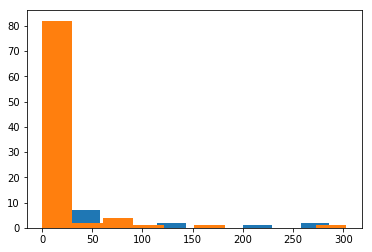

In [120]:
plt.hist(bf_fake_degrees)
plt.hist(bf_real_degrees)

(array([111.,   5.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0. ,  9.8, 19.6, 29.4, 39.2, 49. , 58.8, 68.6, 78.4, 88.2, 98. ]),
 <a list of 10 Patch objects>)

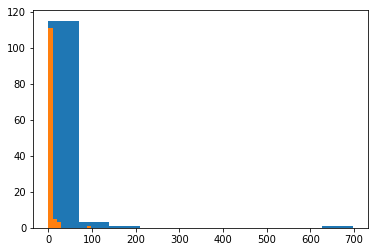

In [119]:
plt.hist(pf_fake_degrees)
plt.hist(pf_real_degrees)

In [100]:
print('range real degree, buzzfeed: ' + '[' + str(min(bf_real_degrees, key=min_nonzero)) + ', ' + str(max(bf_real_degrees)) + ']')
print('range fake degree, buzzfeed: ' + '[' + str(min(bf_fake_degrees, key=min_nonzero)) + ', ' + str(max(bf_fake_degrees)) + ']')
print('range real degree, politifact: ' + '[' + str(min(pf_real_degrees, key=min_nonzero)) + ', ' + str(max(pf_real_degrees)) + ']')
print('range fake degree, politifact: ' + '[' + str(min(pf_fake_degrees, key=min_nonzero)) + ', ' + str(max(pf_fake_degrees)) + ']')

range real degree, buzzfeed: [1, 303]
range fake degree, buzzfeed: [1, 286]
range real degree, politifact: [1, 98]
range fake degree, politifact: [1, 697]


In [110]:
def get_max_degree_headline(source, graph, real, fake, sourcename, other_size):
    max_real_degree = 0
    max_fake_degree = 0
    max_real_headline = ""
    max_fake_headline = ""
    for news in real:
        users = source.loc[source['news'] == news]['user'].values
        subg = graph.subgraph(list(users))
        subg = max(nx.connected_component_subgraphs(subg), key=len)
        degrees = subg.degree()
        max_deg = max(dict(degrees).values())
        if max_deg > max_real_degree:
            max_real_degree = max_deg
            with open('Data/'+ sourcename +'/realNewsContent/' + sourcename + '_real_' + str(news) + '-Webpage.json', 'r') as json_file:
                data = json.load(json_file)
            max_real_headline = data["title"]
    for news in fake:
        news_id = news - other_size
        users = source.loc[source['news'] == news]['user'].values
        subg = graph.subgraph(list(users))
        subg = max(nx.connected_component_subgraphs(subg), key=len)
        degrees = subg.degree()
        max_deg = max(dict(degrees).values())
        if max_deg > max_fake_degree:
            max_fake_degree = max_deg
            with open('Data/'+ sourcename +'/FakeNewsContent/' + sourcename + '_Fake_' + str(news_id) + '-Webpage.json', 'r') as json_file:
                data = json.load(json_file)
            max_fake_headline = data["title"]
    print("Real headline from "+ sourcename +" with max degree = " + str(max_real_degree) + ": " + max_real_headline)
    print("Fake headline from "+ sourcename +" with max degree = " + str(max_fake_degree) + ": " + max_fake_headline)

In [111]:
get_max_degree_headline(buzzfeed_news_spread, buzzfeed_user_graph, buzzfeed_real, buzzfeed_fake, "buzzfeed", 91)
get_max_degree_headline(politifact_news_spread, politifact_user_graph, politifact_real, politifact_fake, "politifact", 120)

Real headline from buzzfeed with max degree = 303: How to watch the first presidential debate
Fake headline from buzzfeed with max degree = 286: Cavuto Just Exposed Lester Holt's Lies During Debate
Real headline from politifact with max degree = 98: Road to 270: CNN's general election map
Fake headline from politifact with max degree = 697: Australia Becomes First Country To Begin Microchipping Its Public


In [114]:
politifact_trump_real = []
politifact_other_real = []
for news in politifact_real:
    with open('data/politifact/realnewscontent/politifact_Real_' + str(news) + '-Webpage.json', 'r') as json_file:
        data = json.load(json_file)
    body = data["text"]
    if is_trump(body):
        politifact_trump_real.append(news)
    else:
        politifact_other_real.append(news)

politifact_trump_fake = []
politifact_other_fake = []
for news in politifact_fake:
    news_id = news - 120
    with open('Data/politifact/FakeNewsContent/politifact_Fake_' + str(news_id) + '-Webpage.json', 'r') as json_file:
        data = json.load(json_file)
    body = data["text"]
    if is_trump(body):
        politifact_trump_fake.append(news)
    else:
        politifact_other_fake.append(news)

In [115]:
print("TRUMP:")
get_max_degree_headline(buzzfeed_news_spread, buzzfeed_user_graph, buzzfeed_trump_real, buzzfeed_trump_fake, "BuzzFeed", 91)
get_max_degree_headline(politifact_news_spread, politifact_user_graph, politifact_trump_real, politifact_trump_fake, "PolitiFact", 120)
print()
print("OTHER:")
get_max_degree_headline(buzzfeed_news_spread, buzzfeed_user_graph, buzzfeed_other_real, buzzfeed_other_fake, "BuzzFeed", 91)
get_max_degree_headline(politifact_news_spread, politifact_user_graph, politifact_other_real, politifact_other_fake, "PolitiFact", 120)

TRUMP:
Real headline from BuzzFeed with max degree = 99: National poll: Clinton leads Trump by 6
Fake headline from BuzzFeed with max degree = 219: Surgeon General warns: Drinking every time Trump lies during debate could result in acute alcohol poisoning
Real headline from PolitiFact with max degree = 98: Road to 270: CNN's general election map
Fake headline from PolitiFact with max degree = 25: Executive Order Leads to Capture of ISIS Leader Rasheed Muhammad

OTHER:
Real headline from BuzzFeed with max degree = 303: How to watch the first presidential debate
Fake headline from BuzzFeed with max degree = 286: Cavuto Just Exposed Lester Holt's Lies During Debate
Real headline from PolitiFact with max degree = 23: When does early voting start in every state?
Fake headline from PolitiFact with max degree = 697: Australia Becomes First Country To Begin Microchipping Its Public


In [116]:
def get_heuristic(source, graph, real, fake):
    real_heuristic = []
    fake_heuristic = []
    for news in real:
        users = source.loc[source['news'] == news]['user'].values
        subg = graph.subgraph(list(users))
        subg = max(nx.connected_component_subgraphs(subg), key=len)
        degrees = subg.degree()
        real_heuristic.append(max(dict(degrees).values())*nx.average_clustering(subg))
    for news in fake:
        users = source.loc[source['news'] == news]['user'].values
        subg = graph.subgraph(list(users))
        subg = max(nx.connected_component_subgraphs(subg), key=len)
        degrees = subg.degree()
        fake_heuristic.append(max(dict(degrees).values())*nx.average_clustering(subg))

    return (real_heuristic, fake_heuristic)

In [117]:
bf_real_heuristics, bf_fake_heuristics = get_heuristic(buzzfeed_news_spread, buzzfeed_user_graph, buzzfeed_real, buzzfeed_fake)
pf_real_heuristics, pf_fake_heuristics = get_heuristic(politifact_news_spread, politifact_user_graph, politifact_real, politifact_fake)

In [118]:
print("Average heuristic value, BuzzFeed, real: " + str(np.average(bf_real_heuristics)))
print("Average heuristic value, BuzzFeed, fake: " + str(np.average(bf_fake_heuristics)))
print("Average heuristic value, PolitiFact, real: " + str(np.average(pf_real_heuristics)))
print("Average heuristic value, PolitiFact, fake: " + str(np.average(pf_fake_heuristics)))

Average heuristic value, BuzzFeed, real: 1.1640816157474108
Average heuristic value, BuzzFeed, fake: 2.1756439188214975
Average heuristic value, PolitiFact, real: 0.05569278434019569
Average heuristic value, PolitiFact, fake: 0.8400845923942496


In [122]:
print("Average heuristic value, BuzzFeed, real: [" + str(min(bf_real_heuristics, key=min_nonzero)) + ", " + str(max(bf_real_heuristics)) +']')
print("Average heuristic value, BuzzFeed, fake: [" + str(min(bf_fake_heuristics, key=min_nonzero)) + ", " + str(max(bf_fake_heuristics)) +']')
print("Average heuristic value, PolitiFact, real: [" + str(min(pf_real_heuristics, key=min_nonzero)) + ", " + str(max(pf_real_heuristics)) +']')
print("Average heuristic value, PolitiFact, fake: [" + str(min(pf_fake_heuristics, key=min_nonzero)) + ", " + str(max(pf_fake_heuristics)) +']')

Average heuristic value, BuzzFeed, real: [0.4368462344205219, 32.54653365426408]
Average heuristic value, BuzzFeed, fake: [0.14, 61.56371603134698]
Average heuristic value, PolitiFact, real: [0.47916666666666663, 3.543956299157183]
Average heuristic value, PolitiFact, fake: [0.25375000000000003, 49.610360378112716]


(array([86.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.]),
 array([ 0.        ,  3.25465337,  6.50930673,  9.7639601 , 13.01861346,
        16.27326683, 19.52792019, 22.78257356, 26.03722692, 29.29188029,
        32.54653365]),
 <a list of 10 Patch objects>)

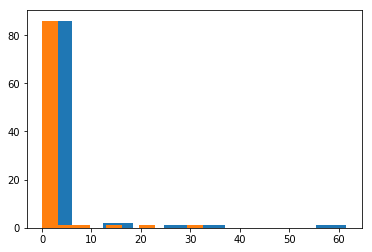

In [123]:
plt.hist(bf_fake_heuristics)
plt.hist(bf_real_heuristics)

(array([115.,   2.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.35439563, 0.70879126, 1.06318689, 1.41758252,
        1.77197815, 2.12637378, 2.48076941, 2.83516504, 3.18956067,
        3.5439563 ]),
 <a list of 10 Patch objects>)

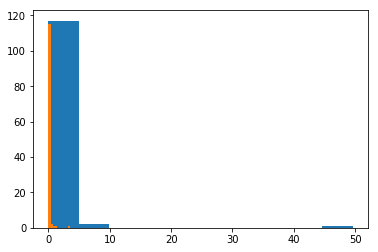

In [124]:
plt.hist(pf_fake_heuristics)
plt.hist(pf_real_heuristics)

In [125]:
bf_real_heuristics, bf_fake_heuristics = get_heuristic(buzzfeed_news_spread, buzzfeed_user_graph, buzzfeed_trump_real, buzzfeed_trump_fake)
pf_real_heuristics, pf_fake_heuristics = get_heuristic(politifact_news_spread, politifact_user_graph, politifact_trump_real, politifact_trump_fake)

In [126]:
print("Average heuristic value, BuzzFeed, real: " + str(np.average(bf_real_heuristics)))
print("Average heuristic value, BuzzFeed, fake: " + str(np.average(bf_fake_heuristics)))
print("Average heuristic value, PolitiFact, real: " + str(np.average(pf_real_heuristics)))
print("Average heuristic value, PolitiFact, fake: " + str(np.average(pf_fake_heuristics)))

Average heuristic value, BuzzFeed, real: 0.981796608275511
Average heuristic value, BuzzFeed, fake: 3.3259931784511805
Average heuristic value, PolitiFact, real: 0.0903126232543714
Average heuristic value, PolitiFact, fake: 0.174709612398172


In [127]:
print("Average heuristic value, BuzzFeed, real: [" + str(min(bf_real_heuristics, key=min_nonzero)) + ", " + str(max(bf_real_heuristics)) +']')
print("Average heuristic value, BuzzFeed, fake: [" + str(min(bf_fake_heuristics, key=min_nonzero)) + ", " + str(max(bf_fake_heuristics)) +']')
print("Average heuristic value, PolitiFact, real: [" + str(min(pf_real_heuristics, key=min_nonzero)) + ", " + str(max(pf_real_heuristics)) +']')
print("Average heuristic value, PolitiFact, fake: [" + str(min(pf_fake_heuristics, key=min_nonzero)) + ", " + str(max(pf_fake_heuristics)) +']')

Average heuristic value, BuzzFeed, real: [0.4368462344205219, 14.240407424677981]
Average heuristic value, BuzzFeed, fake: [1.5307365987921542, 35.05518836417083]
Average heuristic value, PolitiFact, real: [0.47916666666666663, 3.543956299157183]
Average heuristic value, PolitiFact, fake: [0.3888888888888889, 1.7500000000000002]


In [128]:
bf_real_heuristics, bf_fake_heuristics = get_heuristic(buzzfeed_news_spread, buzzfeed_user_graph, buzzfeed_other_real, buzzfeed_other_fake)
pf_real_heuristics, pf_fake_heuristics = get_heuristic(politifact_news_spread, politifact_user_graph, politifact_other_real, politifact_other_fake)

In [129]:
print("Average heuristic value, BuzzFeed, real: " + str(np.average(bf_real_heuristics)))
print("Average heuristic value, BuzzFeed, fake: " + str(np.average(bf_fake_heuristics)))
print("Average heuristic value, PolitiFact, real: " + str(np.average(pf_real_heuristics)))
print("Average heuristic value, PolitiFact, fake: " + str(np.average(pf_fake_heuristics)))

Average heuristic value, BuzzFeed, real: 1.2222014732022197
Average heuristic value, BuzzFeed, fake: 2.0174708956224165
Average heuristic value, PolitiFact, real: 0.0
Average heuristic value, PolitiFact, fake: 1.2684767028026829


In [130]:

print("Average heuristic value, BuzzFeed, real: [" + str(min(bf_real_heuristics, key=min_nonzero)) + ", " + str(max(bf_real_heuristics)) +']')
print("Average heuristic value, BuzzFeed, fake: [" + str(min(bf_fake_heuristics, key=min_nonzero)) + ", " + str(max(bf_fake_heuristics)) +']')
print("Average heuristic value, PolitiFact, real: [" + str(min(pf_real_heuristics, key=min_nonzero)) + ", " + str(max(pf_real_heuristics)) +']')
print("Average heuristic value, PolitiFact, fake: [" + str(min(pf_fake_heuristics, key=min_nonzero)) + ", " + str(max(pf_fake_heuristics)) +']')

Average heuristic value, BuzzFeed, real: [0.4965964590964591, 32.54653365426408]
Average heuristic value, BuzzFeed, fake: [0.14, 61.56371603134698]
Average heuristic value, PolitiFact, real: [0.0, 0.0]
Average heuristic value, PolitiFact, fake: [0.25375000000000003, 49.610360378112716]


In [135]:
def get_max_heuristic_headline(source, graph, real, fake, sourcename, other_size):
    max_real_degree = 0
    max_fake_degree = 0
    max_real_headline = ""
    max_fake_headline = ""
    for news in real:
        users = source.loc[source['news'] == news]['user'].values
        subg = graph.subgraph(list(users))
        subg = max(nx.connected_component_subgraphs(subg), key=len)
        degrees = subg.degree()
        max_deg = max(dict(degrees).values())*nx.average_clustering(subg)
        if max_deg > max_real_degree:
            max_real_degree = max_deg
            with open('Data/'+ sourcename +'/realNewsContent/' + sourcename + '_real_' + str(news) + '-Webpage.json', 'r') as json_file:
                data = json.load(json_file)
            max_real_headline = data["title"]
    for news in fake:
        news_id = news - other_size
        users = source.loc[source['news'] == news]['user'].values
        subg = graph.subgraph(list(users))
        subg = max(nx.connected_component_subgraphs(subg), key=len)
        degrees = subg.degree()
        max_deg = max(dict(degrees).values())*nx.average_clustering(subg)
        if max_deg > max_fake_degree:
            max_fake_degree = max_deg
            with open('Data/'+ sourcename +'/FakeNewsContent/' + sourcename + '_Fake_' + str(news_id) + '-Webpage.json', 'r') as json_file:
                data = json.load(json_file)
            max_fake_headline = data["title"]
    print("Real headline from "+ sourcename +" with max heuristic = " + str(max_real_degree) + ": " + max_real_headline)
    print("Fake headline from "+ sourcename +" with max heuristic = " + str(max_fake_degree) + ": " + max_fake_headline)

In [136]:
print("TRUMP:")
get_max_heuristic_headline(buzzfeed_news_spread, buzzfeed_user_graph, buzzfeed_trump_real, buzzfeed_trump_fake, "BuzzFeed", 91)
get_max_heuristic_headline(politifact_news_spread, politifact_user_graph, politifact_trump_real, politifact_trump_fake, "PolitiFact", 120)
print()
print("OTHER:")
get_max_heuristic_headline(buzzfeed_news_spread, buzzfeed_user_graph, buzzfeed_other_real, buzzfeed_other_fake, "BuzzFeed", 91)
get_max_heuristic_headline(politifact_news_spread, politifact_user_graph, politifact_other_real, politifact_other_fake, "PolitiFact", 120)

TRUMP:
Real headline from BuzzFeed with max heuristic = 14.240407424677981: National poll: Clinton leads Trump by 6
Fake headline from BuzzFeed with max heuristic = 35.05518836417083: Surgeon General warns: Drinking every time Trump lies during debate could result in acute alcohol poisoning
Real headline from PolitiFact with max heuristic = 3.543956299157183: Road to 270: CNN's general election map
Fake headline from PolitiFact with max heuristic = 1.7500000000000002: Democrat Maxine Waters Has Shown Up To Only 10% Of Congressional Meetings For 35 YEARS

OTHER:
Real headline from BuzzFeed with max heuristic = 32.54653365426408: How to watch the first presidential debate
Fake headline from BuzzFeed with max heuristic = 61.56371603134698: Federal Agents Make Massive Discovery at Southern Border… ISIS Is Here ⋆ Freedom Daily
Real headline from PolitiFact with max heuristic = 0: 
Fake headline from PolitiFact with max heuristic = 49.610360378112716: Australia Becomes First Country To Begin